In [2]:
import networkx as nx
%matplotlib inline

In [3]:
network = {}

In [4]:
with open('kargerMinCut.txt', 'r') as f:
    line = f.readline()
    while line:
        line = line.split()
        network[line[0]] = line[1:]
        line = f.readline()     

In [5]:
network

{'1': ['37',
  '79',
  '164',
  '155',
  '32',
  '87',
  '39',
  '113',
  '15',
  '18',
  '78',
  '175',
  '140',
  '200',
  '4',
  '160',
  '97',
  '191',
  '100',
  '91',
  '20',
  '69',
  '198',
  '196'],
 '2': ['123',
  '134',
  '10',
  '141',
  '13',
  '12',
  '43',
  '47',
  '3',
  '177',
  '101',
  '179',
  '77',
  '182',
  '117',
  '116',
  '36',
  '103',
  '51',
  '154',
  '162',
  '128',
  '30'],
 '3': ['48',
  '123',
  '134',
  '109',
  '41',
  '17',
  '159',
  '49',
  '136',
  '16',
  '130',
  '141',
  '29',
  '176',
  '2',
  '190',
  '66',
  '153',
  '157',
  '70',
  '114',
  '65',
  '173',
  '104',
  '194',
  '54'],
 '4': ['91',
  '171',
  '118',
  '125',
  '158',
  '76',
  '107',
  '18',
  '73',
  '140',
  '42',
  '193',
  '127',
  '100',
  '84',
  '121',
  '60',
  '81',
  '99',
  '80',
  '150',
  '55',
  '1',
  '35',
  '23',
  '93'],
 '5': ['193',
  '156',
  '102',
  '118',
  '175',
  '39',
  '124',
  '119',
  '19',
  '99',
  '160',
  '75',
  '20',
  '112',
  '37',
  '2

In [31]:
g = nx.Graph(network,capacity = 200.0)

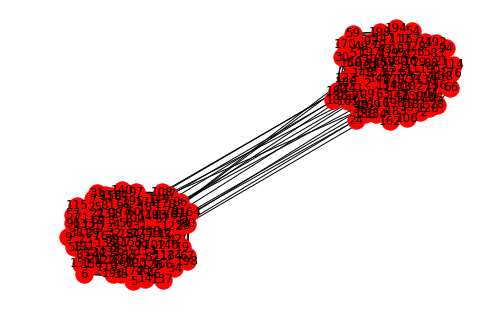

In [32]:
#import matplotlib.pyplot as plt
#plt.figure(1,figsize=(100,100)) 
nx.draw(g, with_labels=True)

In [33]:
cut_value, partition = nx.minimum_cut(g, '1', '200')

NetworkXUnbounded: Infinite capacity path, flow unbounded above.

In [35]:
import random
import copy

In [69]:
def random_contraction_algo(graph):

    cuts = {}
    while len(graph) > 2:
        # choice an edge
        u = random.choice(list(graph.keys()))
        v = random.choice(graph[u])
        
        # delete edge
        # graph[u].remove(v)
        # graph[v].remove(u)
        graph[u] = list(filter(lambda a: a != v, graph[u]))
        graph[v] = list(filter(lambda a: a != u, graph[v]))
        
        # print("delete edge {}-{}".format(u,v))
        
        if v in graph[u]:
            continue
        
        # contraction
        if len(graph[u]) > len(graph[v]):
            u,v = v, u
            
        # print("contraction {}->{}".format(u, v))
        
        graph[v] += graph[u]
        for node in graph[u]:
            graph[node] = [v if x == u else x for x in graph[node]]
        del graph[u]
        
        # put u,v in cut
        if u in cuts.keys():
            cuts[u].append(u)
            cuts.setdefault(v, []).extend(cuts[u])
            del cuts[u]
        else:
            cuts.setdefault(v, []).append(u)
        
        #print(graph)
                
    for g in graph.keys():
        if g not in cuts.keys():
            cuts[g] = None
    
    return graph, cuts

In [70]:
gra = copy.deepcopy(network)
g,cut = random_contraction_algo(gra)
g

{'47': ['163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163',
  '163'],
 '163': ['47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',
  '47',

In [71]:
cut

{'163': ['70', '181'],
 '47': ['88',
  '59',
  '11',
  '41',
  '167',
  '49',
  '168',
  '176',
  '197',
  '184',
  '30',
  '141',
  '180',
  '95',
  '92',
  '182',
  '44',
  '66',
  '147',
  '36',
  '188',
  '13',
  '74',
  '194',
  '16',
  '162',
  '2',
  '48',
  '90',
  '77',
  '134',
  '111',
  '136',
  '169',
  '106',
  '179',
  '173',
  '187',
  '17',
  '105',
  '161',
  '110',
  '43',
  '128',
  '154',
  '170',
  '199',
  '159',
  '153',
  '51',
  '10',
  '138',
  '192',
  '148',
  '21',
  '152',
  '117',
  '28',
  '83',
  '109',
  '50',
  '116',
  '190',
  '186',
  '130',
  '189',
  '94',
  '61',
  '72',
  '29',
  '123',
  '65',
  '82',
  '157',
  '3',
  '177',
  '12',
  '103',
  '33',
  '183',
  '143',
  '142',
  '63',
  '101',
  '54',
  '129',
  '114',
  '104',
  '165',
  '24',
  '93',
  '98',
  '4',
  '139',
  '34',
  '38',
  '107',
  '9',
  '78',
  '158',
  '133',
  '76',
  '69',
  '86',
  '18',
  '140',
  '64',
  '132',
  '144',
  '191',
  '124',
  '58',
  '155',
  '1',
  

In [51]:
import math

In [77]:
def get_min_cut(graph, times):
    
    min_cross_edge = math.inf
    min_cut = {}
    min_g = None
    
    for i in range(times):
    
        gra = copy.deepcopy(graph)
        g, cuts = random_contraction_algo(gra)

        nodes = list(g.keys())

        #cut_nodes = min(nodes, key=lambda x : len(cuts[x]))

        #if len(cuts[cut_nodes]) < min_cut_nodes:
        if len(g[nodes[0]]) < min_cross_edge:
            min_cut = {}
            min_cross_edge = len(g[nodes[0]])
            min_cut[nodes[0]] = cuts[nodes[0]]
            min_cut[nodes[1]] = cuts[nodes[1]]
            min_g = g
        
    return min_cross_edge, min_cut, min_g

In [78]:
min_cross_edge, min_cut, min_g = get_min_cut(network, 10)

In [79]:
min_cross_edge

17

In [80]:
min_g

{'92': ['149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149',
  '149'],
 '149': ['92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92',
  '92']}

In [81]:
min_cut

{'92': ['192',
  '30',
  '163',
  '72',
  '134',
  '28',
  '184',
  '110',
  '61',
  '138',
  '180',
  '36',
  '50',
  '187',
  '51',
  '152',
  '136',
  '165',
  '143',
  '101',
  '179',
  '167',
  '142',
  '194',
  '11',
  '21',
  '104',
  '188',
  '82',
  '13',
  '123',
  '41',
  '24',
  '48',
  '153',
  '116',
  '129',
  '186',
  '197',
  '148',
  '59',
  '106',
  '63',
  '111',
  '29',
  '43',
  '177',
  '94',
  '16',
  '141',
  '114',
  '117',
  '65',
  '74',
  '128',
  '77',
  '176',
  '183',
  '95',
  '169',
  '199',
  '66',
  '12',
  '44',
  '173',
  '162',
  '161',
  '2',
  '147',
  '83',
  '33',
  '170',
  '10',
  '88',
  '154',
  '47',
  '182',
  '3',
  '157',
  '109',
  '103',
  '49',
  '168',
  '189',
  '159',
  '105',
  '70',
  '90',
  '190',
  '130',
  '181',
  '17',
  '54'],
 '149': ['45',
  '18',
  '34',
  '140',
  '151',
  '98',
  '133',
  '156',
  '53',
  '121',
  '196',
  '46',
  '122',
  '139',
  '195',
  '64',
  '85',
  '120',
  '174',
  '166',
  '115',
  '69',
 